##### Abalone Case Study - Vinayak Ratan

Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

##### Name / Data Type / Measurement Unit / Description
-----------------------------
- Sex / nominal / -- / M, F, and I (infant)
- Length / continuous / mm / Longest shell measurement
- Diameter / continuous / mm / perpendicular to length
- Height / continuous / mm / with meat in shell
- Whole weight / continuous / grams / whole abalone
- Shucked weight / continuous / grams / weight of meat
- Viscera weight / continuous / grams / gut weight (after bleeding)
- Shell weight / continuous / grams / after being dried
- Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

- Linearity: assumes that the relationship between predictor and the target variable is linear
- No noise:  eg. that there are no outliers in the data
- No Collinearity: if you have highly correlated predictors, it's most likely your model will overfit
- Normal distribution: more reliable predictions are made if the predictors and the target variable are normally distributed
- Scale: it's a distance-based algorithm, so predictors should be scaled - like with Standard Scaler, MinMaxScaler

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Abalone dataset
abalone_df = pd.read_csv(r'G:\AI Professional\Data Trained\Notes\Github docs\Datasets\dataset1-master\abalone.csv')
abalone_df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
# Shape of dataset
abalone_df.shape

(4177, 9)

In [4]:
# head, tail and sample of dataset
abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
abalone_df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [6]:
abalone_df.sample()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
3516,F,0.7,0.575,0.2,1.7365,0.7755,0.3965,0.461,11


In [7]:
#Checking for type of dataset
type(abalone_df)

pandas.core.frame.DataFrame

In [8]:
abalone_df = pd.DataFrame(data=abalone_df)
abalone_df.sample()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
141,F,0.55,0.45,0.145,0.741,0.295,0.1435,0.2665,10


In [9]:
# data types of the features in the dataset
abalone_df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

- sex is a categorical variable, hence we need to apply encoding before training the dataset

In [10]:
### Checking for null values
abalone_df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

- There are no null values in the dataset

<AxesSubplot:>

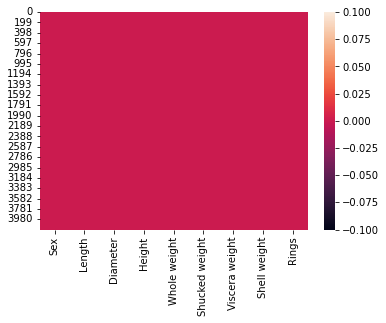

In [11]:
sns.heatmap(abalone_df.isnull())

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

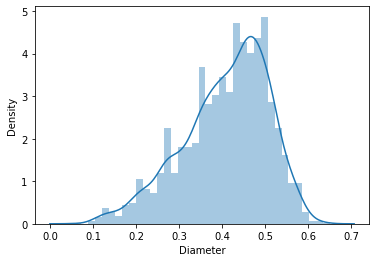

In [12]:
sns.distplot(abalone_df['Diameter'])

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

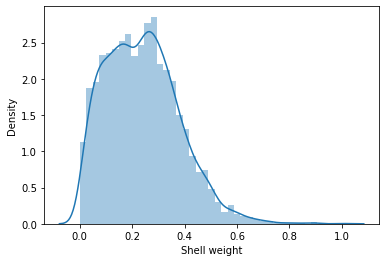

In [13]:
sns.distplot(abalone_df['Shell weight'])

In [14]:
abalone_df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [15]:
abalone_df.iloc[:,0]

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

In [16]:
le = LabelEncoder()
abalone_df['Sex']=le.fit_transform(abalone_df['Sex'])
abalone_df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


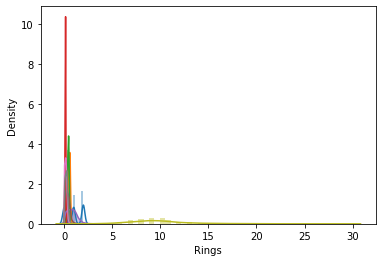

In [17]:
for i in abalone_df.columns:
    sns.distplot(abalone_df[i])

<AxesSubplot:xlabel='Height', ylabel='Density'>

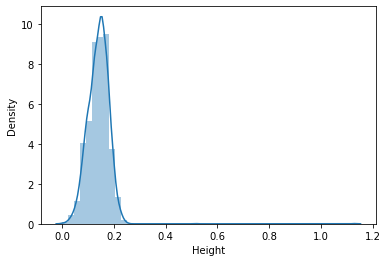

In [18]:
sns.distplot(abalone_df['Height'])

<AxesSubplot:xlabel='Height', ylabel='Count'>

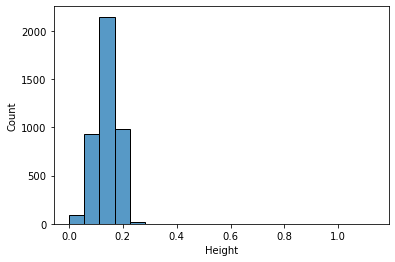

In [19]:
sns.histplot(abalone_df['Height'], bins =20)

<AxesSubplot:xlabel='Rings', ylabel='Count'>

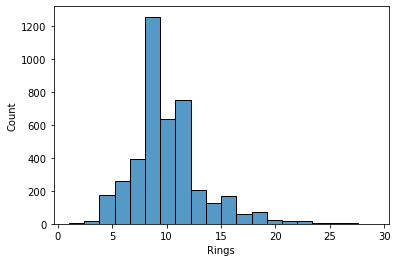

In [20]:
sns.histplot(abalone_df['Rings'], bins=20)

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

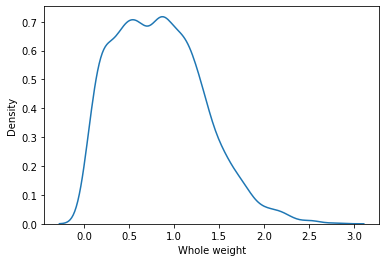

In [21]:
sns.kdeplot(abalone_df['Whole weight'])

<AxesSubplot:xlabel='Shell weight', ylabel='Height'>

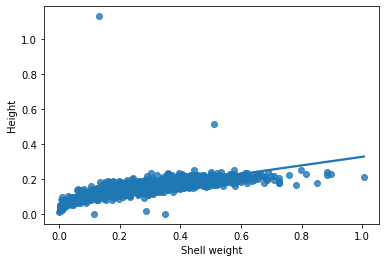

In [22]:
sns.regplot(x= 'Shell weight', y = 'Height', data = abalone_df)

<AxesSubplot:xlabel='Rings', ylabel='Diameter'>

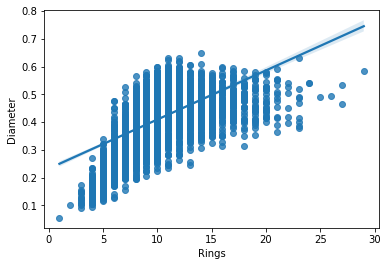

In [23]:
sns.regplot(x= 'Rings', y = 'Diameter', data = abalone_df)

<AxesSubplot:xlabel='Whole weight', ylabel='Diameter'>

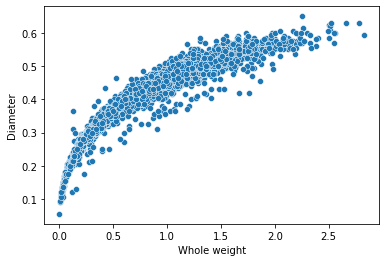

In [24]:
sns.scatterplot(x= 'Whole weight', y = 'Diameter', data = abalone_df)

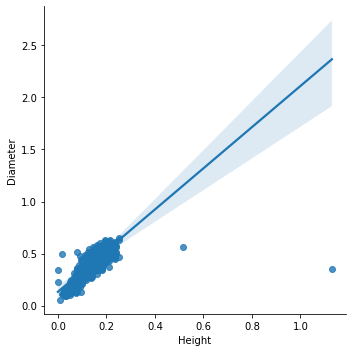

In [25]:
sns.lmplot(x= 'Height', y = 'Diameter', data = abalone_df)

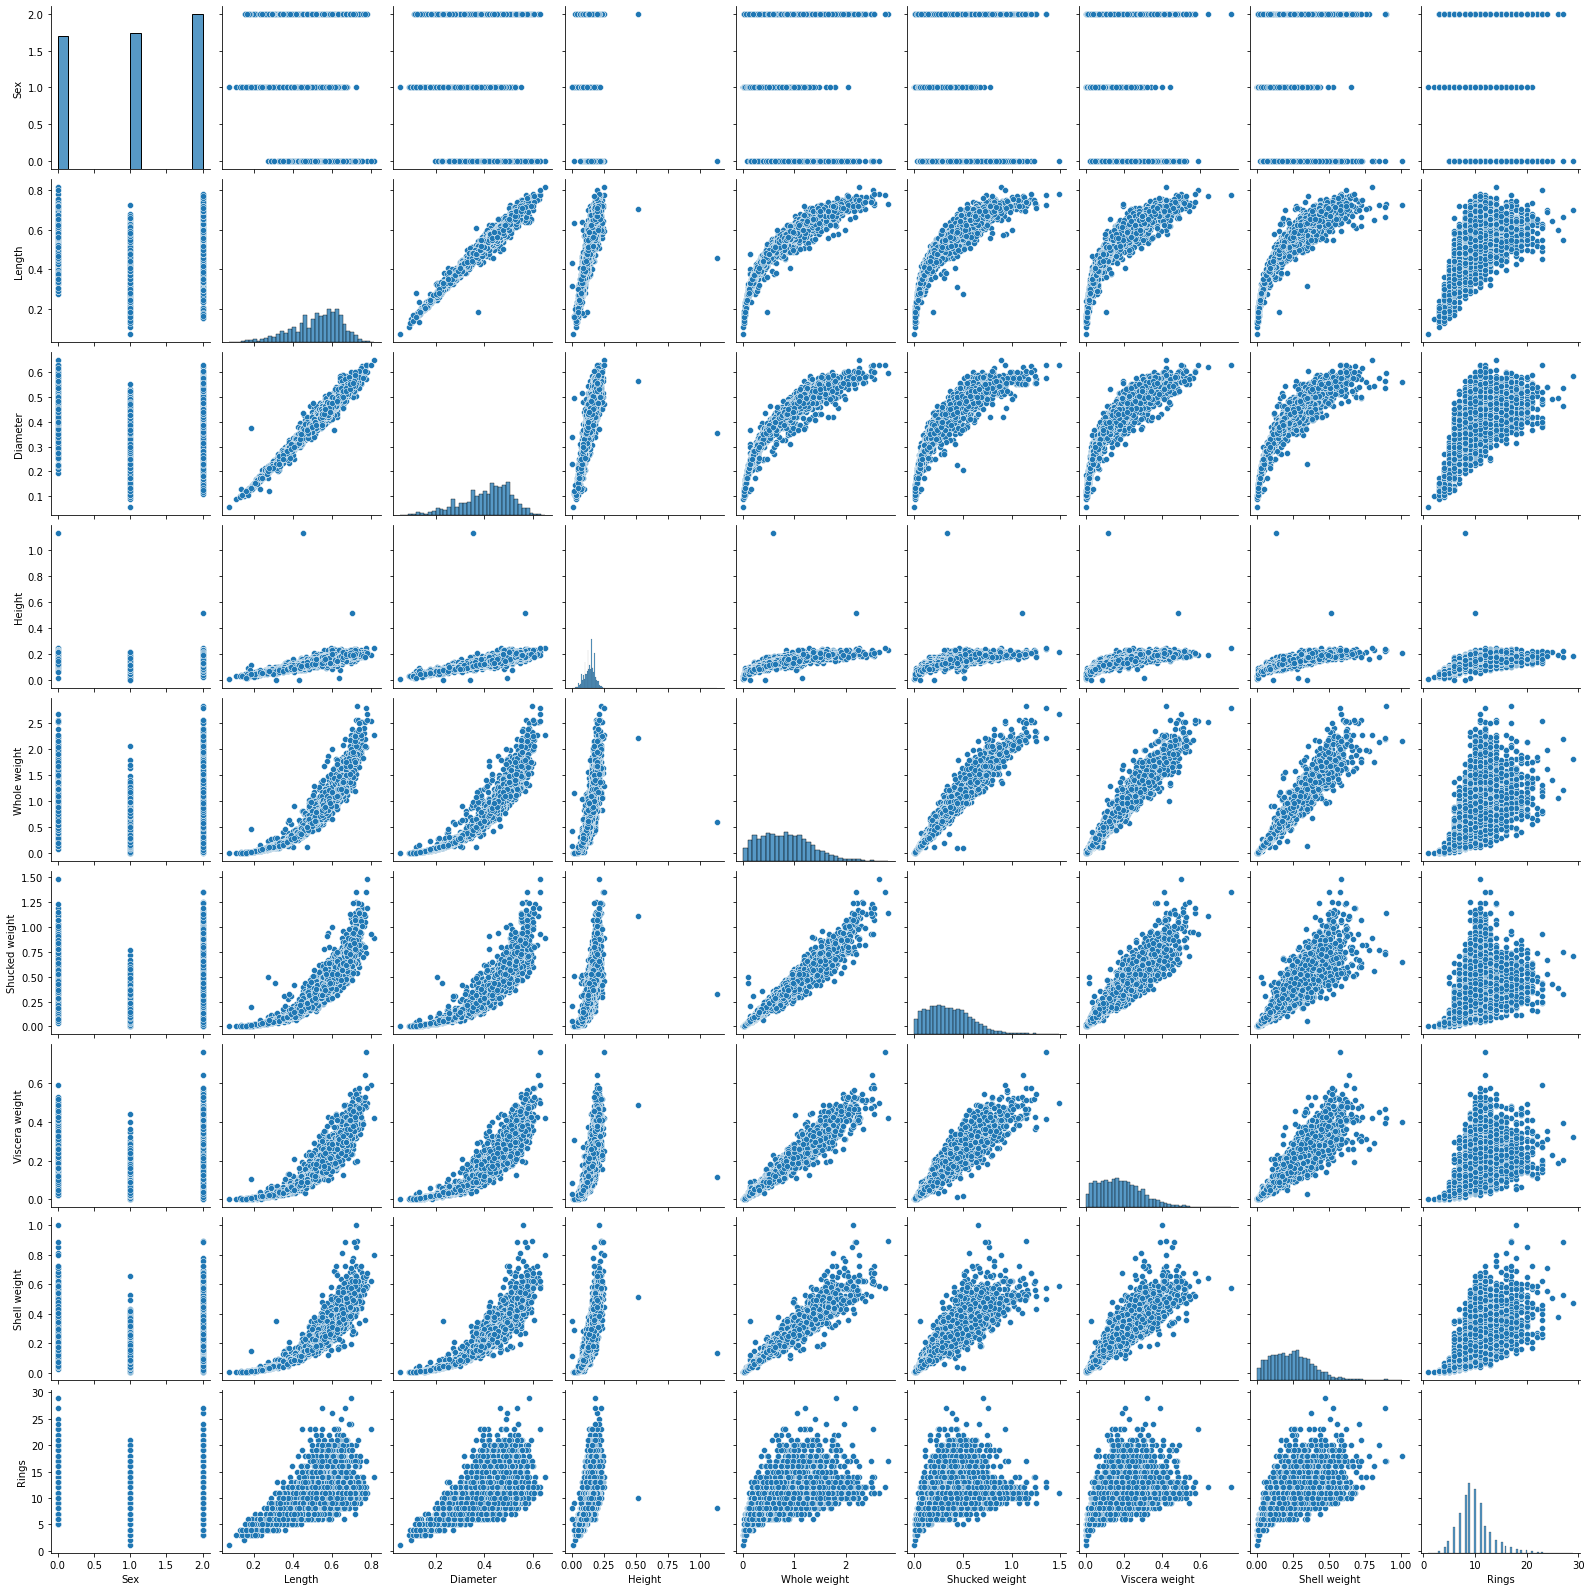

In [26]:
sns.pairplot(abalone_df)

In [27]:
abalone_df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


###### Observations
- Mean of whole weight and shucked weight is higher than median, hence right skewed.
- Also the standard deviation of whole weight and shucked weight is higher, means data spread is high
- Presence of outliers in rings because large difference between 75th percentile and maximum
- Also height has large difference between maximum and 75th percentile

In [28]:
abalone_df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [29]:
# abalone_df['Height'] = np.log(abalone_df['Height'])
abalone_df['Height'] = np.sqrt(abalone_df['Height'])

In [30]:
abalone_df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height           -0.295641
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Count'>

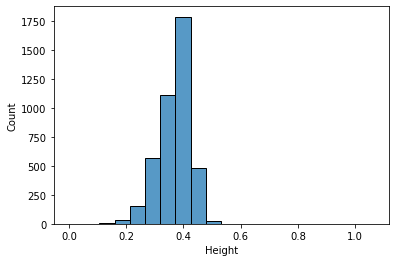

In [31]:
sns.histplot(abalone_df['Height'], bins=20)

##### Removing outliers

In [32]:
from scipy.stats import zscore
z_ab= np.abs(zscore(abalone_df))

In [33]:
np.where(z_ab>3)

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
         166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
         237,  238,  238,  238,  239,  239,  270,  275,  277,  278,  294,
         306,  310,  313,  314,  334,  351,  355,  358,  358,  362,  375,
         416,  417,  428,  431,  433,  469,  478,  480,  501,  526,  526,
         530,  572,  628,  673,  674,  675,  678,  694,  694,  696,  696,
         718,  719,  719,  719,  720,  720,  720,  744,  754,  756,  811,
         891,  891,  891, 1048, 1051, 1051, 1052, 1174, 1193, 1197, 1199,
        1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209, 1209, 1257,
        1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428, 1429, 1429,
        1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762, 1763,
        1763, 1763, 1821, 1982, 1986, 1987, 1987, 1987, 2051, 2090, 2108,
        2108, 2114, 2114, 2114, 2157, 2161, 2169, 2171, 2172, 2176, 2180,
        2199, 2201, 2208, 2209, 2274, 

In [34]:
abalone_df_new = abalone_df[(z_ab<3).all(axis=1)]
abalone_df_new

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.308221,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.300000,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.367423,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.353553,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.282843,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.406202,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.367423,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.452769,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.387298,1.0945,0.5310,0.2610,0.2960,10


In [35]:
# Percentage loss of data
loss_percent_ab = (4177-4019)/4019*100
print(loss_percent_ab,'%')

3.9313262005474 %


In [36]:
abalone_df=abalone_df_new

In [37]:
abalone_df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.043978,-0.046893,-0.047602,-0.034812,-0.016429,-0.045187,-0.043998,-0.033682
Length,-0.043978,1.000000,0.985807,0.907285,0.935022,0.909742,0.908448,0.914874,0.563535
Diameter,-0.046893,0.985807,1.000000,0.912648,0.934606,0.904681,0.904582,0.922138,0.581657
Height,-0.047602,0.907285,0.912648,1.000000,0.882321,0.835174,0.860207,0.889508,0.616311
Whole weight,-0.034812,0.935022,0.934606,0.882321,1.000000,0.970881,0.966476,0.961026,0.545911
Shucked weight,-0.016429,0.909742,0.904681,0.835174,0.970881,1.000000,0.929837,0.895712,0.437522
Viscera weight,-0.045187,0.908448,0.904582,0.860207,0.966476,0.929837,1.000000,0.919089,0.520584
Shell weight,-0.043998,0.914874,0.922138,0.889508,0.961026,0.895712,0.919089,1.000000,0.620817
Rings,-0.033682,0.563535,0.581657,0.616311,0.545911,0.437522,0.520584,0.620817,1.000000


<AxesSubplot:>

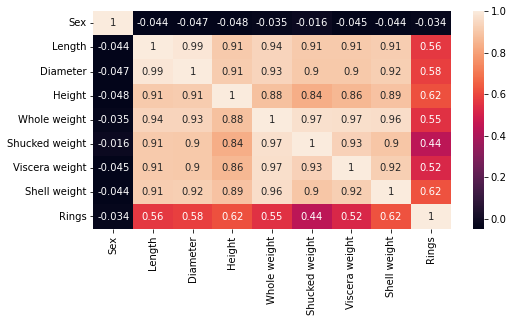

In [38]:
plt.figure(figsize=(8,4))
sns.heatmap(abalone_df.corr(), annot = True)

- There is a presence of multicolinearity in the data i.e. model will not be able to predict which feature is contributing more

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
x=abalone_df.iloc[:,0:-1]
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.308221,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.300000,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.367423,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.353553,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.282843,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.406202,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.367423,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.452769,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.387298,1.0945,0.5310,0.2610,0.2960


In [41]:
x.shape

(4019, 8)

In [42]:
x.shape[1]

8

In [43]:
y = abalone_df.iloc[:,-1]
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4019, dtype: int64

In [44]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF_Factor']= [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [45]:
vif_calc()

   VIF_Factor        features
0    2.632493             Sex
1  802.340579          Length
2  763.963727        Diameter
3  154.948351          Height
4  441.891678    Whole weight
5  110.275122  Shucked weight
6   65.499021  Viscera weight
7   92.744708    Shell weight


###### Observation
- Length and Diameter, and whole weight and shucked weight have high multicollinearity which can be even seen in the correlation matrix.
- Hence we need to drop any one of the columns
- In Length and Diameter - dropping length because correlation with the target variable is less compared with diameter 
- In Length and Diameter - dropping shucked weight because correlation with the target variable is less compared with whole weight

Data Cleansing

Feature Engineering - selection of features/variables/columns

In [46]:
abalone_df.drop(['Length', 'Shucked weight'], axis = 1, inplace = True)
abalone_df

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,2,0.365,0.308221,0.5140,0.1010,0.1500,15
1,2,0.265,0.300000,0.2255,0.0485,0.0700,7
2,0,0.420,0.367423,0.6770,0.1415,0.2100,9
3,2,0.365,0.353553,0.5160,0.1140,0.1550,10
4,1,0.255,0.282843,0.2050,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,0,0.450,0.406202,0.8870,0.2390,0.2490,11
4173,2,0.440,0.367423,0.9660,0.2145,0.2605,10
4174,2,0.475,0.452769,1.1760,0.2875,0.3080,9
4175,0,0.485,0.387298,1.0945,0.2610,0.2960,10


In [47]:
x=abalone_df.iloc[:,0:-1]
x

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,2,0.365,0.308221,0.5140,0.1010,0.1500
1,2,0.265,0.300000,0.2255,0.0485,0.0700
2,0,0.420,0.367423,0.6770,0.1415,0.2100
3,2,0.365,0.353553,0.5160,0.1140,0.1550
4,1,0.255,0.282843,0.2050,0.0395,0.0550
...,...,...,...,...,...,...
4172,0,0.450,0.406202,0.8870,0.2390,0.2490
4173,2,0.440,0.367423,0.9660,0.2145,0.2605
4174,2,0.475,0.452769,1.1760,0.2875,0.3080
4175,0,0.485,0.387298,1.0945,0.2610,0.2960


In [48]:
vif_calc()

   VIF_Factor        features
0    2.623184             Sex
1  207.507326        Diameter
2  131.432133          Height
3  140.572357    Whole weight
4   60.762342  Viscera weight
5   58.911776    Shell weight


In [49]:
x.shape

(4019, 6)

##### Scaling

In [50]:
scale = StandardScaler()
x= scale.fit_transform(x)
x

array([[ 1.15835802, -0.42766545, -1.1645936 , -0.63693837, -0.7267137 ,
        -0.63462928],
       [ 1.15835802, -1.4770503 , -1.32420851, -1.27043818, -1.23554834,
        -1.26104553],
       [-1.28480172,  0.14949622, -0.01509984, -0.27901646, -0.33418412,
        -0.1648171 ],
       ...,
       [ 1.15835802,  0.72665788,  1.64199279,  0.81670767,  1.08086078,
         0.60254279],
       [-1.28480172,  0.83159637,  0.37079505,  0.63774671,  0.82402043,
         0.50858036],
       [ 1.15835802,  1.56616576,  1.4248959 ,  2.51299401,  1.94345664,
         2.06679076]])

In [51]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size= 0.3, random_state=55)

In [52]:
x_train.shape

(2813, 6)

In [53]:
y_train.shape

(2813,)

In [54]:
x_test.shape

(1206, 6)

In [55]:
y_test.shape

(1206,)

In [56]:
lr=LinearRegression()
lr.fit(x_train, y_train)
lr.coef_

array([ 0.00840657,  0.36149019,  1.02282032, -2.76538666,  0.13076611,
        3.07787733])

In [57]:
features = ['Sex', 'Diameter', 'Height', 'Whole weight', 'Viscera weight', 'Shell weight']
features

['Sex', 'Diameter', 'Height', 'Whole weight', 'Viscera weight', 'Shell weight']

In [58]:
list(zip(lr.coef_,features))

[(0.008406569042268766, 'Sex'),
 (0.36149018863995214, 'Diameter'),
 (1.022820321238085, 'Height'),
 (-2.765386661105307, 'Whole weight'),
 (0.13076611122676382, 'Viscera weight'),
 (3.077877328125384, 'Shell weight')]

In [59]:
cfdf=pd.DataFrame(data =lr.coef_,index = features)
cfdf

,0
Sex,0.008407
Diameter,0.361490
Height,1.022820
Whole weight,-2.765387
Viscera weight,0.130766
Shell weight,3.077877


In [60]:
lr.intercept_

9.780269356675209

In [61]:
lr.score(x_train, y_train)

0.46367716121560787

In [62]:
pred =lr.predict(x_test)
pred

array([12.11331063, 11.61504384,  9.61650377, ..., 10.38679789,
        9.70195901, 10.88035602])

In [63]:
print('Predicted Values: ', pred)

Predicted Values:  [12.11331063 11.61504384  9.61650377 ... 10.38679789  9.70195901
 10.88035602]


In [64]:
preddf=pd.DataFrame(data=pred)
preddf

,0
0,12.113311
1,11.615044
2,9.616504
3,10.017946
4,10.587250
...,...
1201,5.959364
1202,11.950754
1203,10.386798
1204,9.701959


In [65]:
lr.score(x_test, y_test)

0.42899509023721416

In [66]:
print('Mean absolute error: ', mean_absolute_error(y_test, pred))
print('Mean Squared error: ', mean_squared_error(y_test, pred))
print('Root mean error: ', np.sqrt(mean_squared_error(y_test, pred)))

Mean absolute error:  1.5985286611387983
Mean Squared error:  4.538196137382711
Root mean error:  2.130304235874001


In [67]:
print('R2 Score: ', r2_score(y_test, pred))

R2 Score:  0.42899509023721416


In [68]:
# Checking the prediction
t = np.array([1,0.45,0.09,0.52,0.1012,0.149])
t

array([1.    , 0.45  , 0.09  , 0.52  , 0.1012, 0.149 ])

In [69]:
t.shape

(6,)

In [70]:
t=t.reshape(1,-1)

In [71]:
lr.predict(t)

array([9.07723653])

##### Regularization

- done to avoid overfitting or underfitting of model

In [72]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

rd =Ridge(alpha= 0.0001, random_state=45)
rd.fit(x_train, y_train)
rd.score(x_train, y_train)


0.4636771612155063

In [73]:
rd.coef_

array([ 0.00840652,  0.36148979,  1.02282057, -2.76538155,  0.13076408,
        3.07787431])

In [74]:
cfrd = pd.DataFrame(data=lr.coef_, index= features)

In [75]:
cfrd

,0
Sex,0.008407
Diameter,0.361490
Height,1.022820
Whole weight,-2.765387
Viscera weight,0.130766
Shell weight,3.077877


In [76]:
predict = rd.predict(x_test)

In [77]:
predict

array([12.11331007, 11.61504259,  9.61650362, ..., 10.38679809,
        9.70196011, 10.88035501])

In [78]:
r2_score(y_test,predict)

0.4289951284032698

In [79]:
# Using lasso regularization
ls = Lasso(alpha = 0.0001, random_state =47)
ls.fit(x_train, y_train)
ls.score(x_train,y_train)

0.46367698288314974

In [80]:
pred_ls = ls.predict(x_test)

In [81]:
pred_ls

array([12.11283243, 11.61287444,  9.61572211, ..., 10.38686793,
        9.70287631, 10.87837252])

In [82]:
r2_score(y_test, pred_ls)

0.42904342571409815

In [83]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [84]:
# Decision Tree Regressor
dta = DecisionTreeRegressor(criterion ='mse')
dta.fit(x_train, y_train)
pred_dta = dta.predict(x_test)
print('Training Score of DTR: ', dta.score(x_train, y_train))
print('Testing Score of DTR: ', dta.score(x_test, y_test))

Training Score of DTR:  1.0
Testing Score of DTR:  0.03181745396178526


In [85]:
pred_dta

array([11., 11., 10., ..., 10.,  9.,  9.])

In [86]:
print("R2 Score of Decison Tree Regressor: ", r2_score(y_test, pred_dta))

R2 Score of Decison Tree Regressor:  0.03181745396178526


In [87]:
print("Mean Squared error of DTR: ", mean_squared_error(y_test, pred_dta))

Mean Squared error of DTR:  7.69485903814262


In [88]:
print("Root Mean Squared error of DTR: ", np.sqrt(mean_squared_error(y_test, pred_dta)))

Root Mean Squared error of DTR:  2.7739608934054245


In [89]:
# Support Vector Machine Regressor
sta = SVR()
sta.fit(x_train, y_train)
pred_sta =sta.predict(x_test)
print('Score of SVR: ', sta.score(x_train, y_train))
print('Testing Score of SVR: ', sta.score(x_test, y_test))
print("R2 Score of Support Vector Regressor: ", r2_score(y_test, pred_sta))
print("Mean Squared error of SVR: ", mean_squared_error(y_test, pred_sta))
print("Root Mean Squared error of SVR: ", np.sqrt(mean_squared_error(y_test, pred_sta)))

Score of SVR:  0.4944271700751568
Testing Score of SVR:  0.4699932167972434
R2 Score of Support Vector Regressor:  0.4699932167972434
Mean Squared error of SVR:  4.212353861049313
Root Mean Squared error of SVR:  2.052401973554234


In [90]:
# K Neighbor Regressor
kna = KNeighborsRegressor()
kna.fit(x_train, y_train)
pred_kna =kna.predict(x_test)
print('Score of KNR: ', kna.score(x_train, y_train))
print('Testing Score of KNR: ', kna.score(x_test, y_test))
print("R2 Score of K Neighbor Regressor: ", r2_score(y_test, pred_kna))
print("Mean Squared error of KNR: ", mean_squared_error(y_test, pred_kna))
print("Root Mean Squared error of KNR: ", np.sqrt(mean_squared_error(y_test, pred_kna)))

Score of KNR:  0.6336510927605445
Testing Score of KNR:  0.3851706976606979
R2 Score of K Neighbor Regressor:  0.3851706976606979
Mean Squared error of KNR:  4.886500829187396
Root Mean Squared error of KNR:  2.2105431072900155


##### Cross Validation

In [91]:
# Before proceeding with the hpyer parameter tunning we will check for cross validation
# 1. Cross validation for Liner Regression
from sklearn.model_selection import cross_val_score
max_cvscore = 0 
max_cv = 0
for j in range(2,15):
    cv_score = cross_val_score(lr, x,y,cv=j)
    cv_mean = cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print('\n') 
    
    if cv_mean > max_cvscore:
        max_cvscore=cv_mean
        max_cv = j
        print(f"At cross fold {j} the Maximum CV score is {max_cvscore}")

At cross fold 2 the cv score is 0.4503501212145865


At cross fold 2 the Maximum CV score is 0.4503501212145865
At cross fold 3 the cv score is 0.4349076777405541


At cross fold 4 the cv score is 0.3444550189204234


At cross fold 5 the cv score is 0.34633830101678553


At cross fold 6 the cv score is 0.35522481357710584


At cross fold 7 the cv score is 0.36469292611112053


At cross fold 8 the cv score is 0.3283687402650893


At cross fold 9 the cv score is 0.3596267497098922


At cross fold 10 the cv score is 0.30585516871258633


At cross fold 11 the cv score is 0.3072874361481625


At cross fold 12 the cv score is 0.331331678132194


At cross fold 13 the cv score is 0.3181694842023312


At cross fold 14 the cv score is 0.32923392934092827




In [92]:
# 2. Cross validation for Decision Tree
from sklearn.model_selection import cross_val_score
max_cvscore = 0 
max_cv = 0
for j in range(2,15):
    cv_score = cross_val_score(dta,x,y,cv=j)
    cv_mean = cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print('\n') 
    
    if cv_mean > max_cvscore:
        max_cvscore=cv_mean
        max_cv = j
        print(f"At cross fold {j} the Maximum CV score is {max_cvscore}")

At cross fold 2 the cv score is -0.009650693944530109


At cross fold 3 the cv score is -0.040527601639742374


At cross fold 4 the cv score is -0.19234100627840653


At cross fold 5 the cv score is -0.168276033332622


At cross fold 6 the cv score is -0.15742427928185457


At cross fold 7 the cv score is -0.19196061487871705


At cross fold 8 the cv score is -0.3570882757291607


At cross fold 9 the cv score is -0.1942684116868459


At cross fold 10 the cv score is -0.33808918264237997


At cross fold 11 the cv score is -0.31709105810866883


At cross fold 12 the cv score is -0.30761035518423746


At cross fold 13 the cv score is -0.35365769456205504


At cross fold 14 the cv score is -0.24927506905219957




In [94]:
# 3. Cross validation for Support Vector Regressor
from sklearn.model_selection import cross_val_score
max_cvscore = 0 
max_cv = 0
for j in range(2,15):
    cv_score = cross_val_score(sta, x,y,cv=j)
    cv_mean = cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print('\n') 
    
    if cv_mean > max_cvscore:
        max_cvscore=cv_mean
        max_cv = j
        print(f"At cross fold {j} the Maximum CV score is {max_cvscore}")

At cross fold 2 the cv score is 0.4644155678205805


At cross fold 2 the Maximum CV score is 0.4644155678205805
At cross fold 3 the cv score is 0.46711704974403156


At cross fold 3 the Maximum CV score is 0.46711704974403156
At cross fold 4 the cv score is 0.4326603046749068


At cross fold 5 the cv score is 0.42585014099170754


At cross fold 6 the cv score is 0.4323087191733212


At cross fold 7 the cv score is 0.4358014778748579


At cross fold 8 the cv score is 0.4271742397699322


At cross fold 9 the cv score is 0.432039669261742


At cross fold 10 the cv score is 0.4097983131910709


At cross fold 11 the cv score is 0.41038617422354445


At cross fold 12 the cv score is 0.4334515948982278


At cross fold 13 the cv score is 0.4203504322718909


At cross fold 14 the cv score is 0.42095932086824667




In [95]:
# 4. Cross validation for K Nearest Neighbor
from sklearn.model_selection import cross_val_score
max_cvscore = 0 
max_cv = 0
for j in range(2,15):
    cv_score = cross_val_score(kna, x,y,cv=j)
    cv_mean = cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print('\n') 
    
    if cv_mean > max_cvscore:
        max_cvscore=cv_mean
        max_cv = j
        print(f"At cross fold {j} the Maximum CV score is {max_cvscore}")

At cross fold 2 the cv score is 0.4196904245730504


At cross fold 2 the Maximum CV score is 0.4196904245730504
At cross fold 3 the cv score is 0.41813389343863205


At cross fold 4 the cv score is 0.3343517887527462


At cross fold 5 the cv score is 0.3408566343120297


At cross fold 6 the cv score is 0.35519614789936466


At cross fold 7 the cv score is 0.35802361919973064


At cross fold 8 the cv score is 0.320059617563431


At cross fold 9 the cv score is 0.35743727465194114


At cross fold 10 the cv score is 0.2982131715061825


At cross fold 11 the cv score is 0.3012167748532798


At cross fold 12 the cv score is 0.33283926522294227


At cross fold 13 the cv score is 0.3171162867638397


At cross fold 14 the cv score is 0.32529658386342925




- Out of models build Support Vector Regressor is having better accuracy. Maximum accuracy is at cross validation 3

##### Hyper Parameter tunning

In [96]:
# Now further using support vector regressor for  'poly', 'rbf', 'sigmoid', 'precomputed'
from sklearn.model_selection import GridSearchCV
# creating parameter list for GridSearchCV
parameters = { 'kernel':['linear'],
             'C': [0.1, 1, 10, 100, 1000],
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

In [97]:
grid_svr = GridSearchCV(sta,
                     parameters,
                     cv=3)

In [98]:
# Training grid search 
grid_svr.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']})

In [99]:
# Getting the best parameters
grid_svr.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [101]:
grid_svr.best_estimator_

SVR(C=10, gamma=1, kernel='linear')

In [110]:
from sklearn.metrics import accuracy_score
grid_svr_pred=grid_svr.best_estimator_.predict(x_test)

print('Final Accuracy with Support Vector Regressor')
r2_score(y_test,grid_svr_pred)

Final Accuracy with Support Vector Regressor


0.4124918565922725

##### Pickling and final conclusion

In [111]:
# Pickling of the file or serialization of a file
import joblib
joblib.dump(grid_svr.best_estimator_,"AbaloneAge.pkl")

['AbaloneAge.pkl']

In [112]:
abalone_model = joblib.load('AbaloneAge.pkl')
abalone_result = abalone_model.score(x_test, y_test)
print(abalone_result*100)

41.24918565922725


In [113]:
abalone_conclusion = pd.DataFrame([abalone_model.predict(x_test),y_test], index=['Predicted', 'Original'])
abalone_conclusion

,0,1,2,3,4,5,6,7,8,9,...,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205
Predicted,11.711418,11.265516,9.276676,9.409012,9.933553,8.419888,11.598723,8.578731,10.128411,10.477631,...,9.207689,4.704427,7.614913,9.03273,9.043201,5.595234,11.407919,9.975996,9.270534,10.402719
Original,12.000000,10.000000,9.000000,9.000000,9.000000,9.000000,13.000000,9.000000,10.000000,10.000000,...,14.000000,7.000000,7.000000,9.00000,8.000000,5.000000,10.000000,8.000000,10.000000,13.000000


- Model is prdicting good, wanted to apply other kernels but it was taking longer time to execute. 

##### Thank you